# DSC410: Project Milestone 4 - Build Your Model
---

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

## Instructions: 
- Choose the appropriate model(s) based on my problem statement and understanding of the algorithms taught in the class
- Be prepared for errors and iterations during model building; revisiting earlier deliverables may be necessary based on insights gained from modeling
- If necessary, consider reducing the dataset size to facilitate model training and evaluation
- Focus on learning the predictive analytics process; imperfections in the data won't significantly impact your grade in this learning environment
- Submit your model, hyperparameter tuning, and model evaluation code, following the format outlined in the text and supplemental readings

## Data Source and Description of Data:
**About Dataset** <br>
The data source I have chosen for my term project is a healthcare dataset that consists of healthcare records and related patient features. Each entry presents a patient's time during their admission to a healthcare facility. Columns included in the dataset are:
- **Name**: Patient's name
- **Age**: Age of the patient 
- **Gender**: Patient's gender
- **Blood Type**: Patient's blood type
- **Medical Condition**: Primary diagnosis or health condition
- **Date of Admission**: Admission date to the healthcare facility
- **Doctor**: Attending doctor's name
- **Hospital**: Healthcare facility or hospital of admission
- **Insurance Provider**: Patient's insurance provider
- **Billing Amount**: Total billed amount for healthcare services
- **Admission Type**: Type of admission (Emergency, Elective, Urgent)
- **Discharge Date**: Date of patient discharge
- **Medication**: Prescribed or administered medication
- **Test Results**: Outcome of medical tests (Normal, Abnormal, Inconclusive)

**Project Objective**: <br>
The goal of the project is to create a predictive model that predicts **Billing Amount** based on relevant main features

## Table of Contents:
- Data Cleaning
- EDA
- Data Preprocessing and Feature Engineering
- Model Training
- Model Tuning
- Model Retraining

## Data Cleaning:
**Objective**: 
1. Exploring the dataset to understand what needs to be cleaned
2. Observation/Interpretation from initial data exploration (cleaning)
3. Addressing issues and ensuring that the dataset is ready for EDA

In [113]:
# Setup
import pandas as pd
import numpy as np

### 1. Exploring the dataset to understand what needs to be cleaned:

In [114]:
# Loading healthcare dataset and displaying results

healthcare_dataset = pd.read_csv('healthcare_dataset_v2.csv')
healthcare_dataset.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,61,45,77,84,56
Gender,Female,Male,Male,Male,Male
Blood Type,AB+,B+,B-,A+,O+
Medical Condition,Breast Cancer,Chronic Bronchitis,Bacterial Pneumonia,Childhood Asthma,Viral Pneumonia
Date of Admission,11/17/2022,6/1/2023,1/9/2019,5/2/2020,7/9/2021
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Blue Cross,UnitedHealthcare,Medicare,Blue Cross,UnitedHealthcare
Billing Amount,"97,088","1,405","9,188","3,773","9,880"


In [115]:
# Displaying a summary of the dataset to gain insights into its structure and composition:
    # Checking information on null values per column (no null values)
    # Ensuring each column has the correct data type

healthcare_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                99 non-null     object
 1   Age                 99 non-null     int64 
 2   Gender              99 non-null     object
 3   Blood Type          99 non-null     object
 4   Medical Condition   99 non-null     object
 5   Date of Admission   99 non-null     object
 6   Doctor              99 non-null     object
 7   Hospital            99 non-null     object
 8   Insurance Provider  99 non-null     object
 9   Billing Amount      99 non-null     object
 10  Admission Type      99 non-null     object
 11  Discharge Date      99 non-null     object
 12  Medication          99 non-null     object
 13  Test Results        99 non-null     object
dtypes: int64(1), object(13)
memory usage: 11.0+ KB


In [116]:
# Displaying summary for numerical features:
    # Checking numerical measures like mean, median, and quartiles
    
numerical_summary = healthcare_dataset.describe()
numerical_summary

,Age
count,99.000000
mean,53.464646
std,17.721953
min,19.000000
25%,41.000000
50%,54.000000
75%,67.000000
max,84.000000


In [117]:
# Displaying summary for categorical features:
    # Exploring distribution and frequency for each categorical column
    # Identifying potential need for standardization in categorical columns
    # Verifying that only categorical features are present, ensuring exclusion of numerical features
    
categorical_features = healthcare_dataset.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(healthcare_dataset[feature].value_counts())


Distribution of Name:
Name
Tiffany Ramirez            1
Juan Patel                 1
Linda Wheeler              1
Ryan Richmond              1
Christina Martinez         1
                          ..
Teresa Gonzalez            1
Shannon Fitzpatrick DVM    1
Ronnie Hughes              1
Francis Newman             1
Christian Guerrero         1
Name: count, Length: 99, dtype: int64

Distribution of Gender:
Gender
Male      51
Female    48
Name: count, dtype: int64

Distribution of Blood Type:
Blood Type
A+     16
O+     16
A-     16
B+     14
B-     13
AB-    10
AB+     7
O-      7
Name: count, dtype: int64

Distribution of Medical Condition:
Medical Condition
Leukemia                  9
Bacterial Pneumonia       9
Primary Hypertension      8
Mycoplasma Pneumonia      8
Secondary Hypertension    7
Acute Bronchitis          7
Gestational Diabetes      7
Viral Pneumonia           6
Childhood Asthma          5
Chronic Bronchitis        5
Colon Cancer              4
Breast Cancer          

In [118]:
# Displaying null value count per feature:
    # Created to understand null value spread throughout dataset

null_count = healthcare_dataset.isnull().sum()
null_count

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [119]:
# Displaying null value percentage per feature
    # Created to understand null value percentage spread throughout dataset

null_percentage = (healthcare_dataset.isnull().sum() / len(healthcare_dataset)) * 100
null_percentage = null_percentage.round(3)
null_percentage

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

### 2. Observation/Interpretation from initial data exploration (Cleaning):

In my data exploration to understand what neeeds to be cleaned, I did not find any null values. However, I did find features that had the wrong datatypes. For my data cleaning procedure, I will convert:
- **Discharge Date**: Object to DateTime
- **Date of Admission**: Object to DateTime
- **Billing Amount**: Object to Int64

I also would like to group values in the Medical Condition column so that I can better visualize my correlation visualizations. By binning similar medical conditions together, the relationships between my categoricals and Billing Amounts can be shown more effectively. Looking at the groupings, I don't believe this process will skew the dataset as many of them fall under the same umbrella. The mappings are: 
- **Cancer**: Breast Cancer, Leukemia, Colon Cancer, Lung Cancer
- **Bronchitis**: Chronic Bronchitis, Acute Bronchitis 
- **Pneumonia**: Bacterial Pneumonia, Viral Pneumonia, Mycoplasma Pneumonia
- **Asthma**: Childhood Asthma, Non-Allergic Asthma, Occupational Asthma, Severe Asthma
- **Diabetes**: Type 1 Diabetes, Secondary Diabetes, Monogenic Diabetes, Type 2 Diabetes
- **Hypertension**: Primary Hypertension, Secondary Hypertension

### 3. Addressing issues and ensuring that the dataset is ready for EDA:

In [120]:
# Creating a copy of the df to perform data cleaning procedures
healthcare_dataset_dcleaning = healthcare_dataset.copy()

In [121]:
# Converting 'Discharge Date' from object to datetime
healthcare_dataset_dcleaning['Discharge Date'] = pd.to_datetime(healthcare_dataset_dcleaning['Discharge Date'])

# Converting 'Date of Admission' from object to datetime
healthcare_dataset_dcleaning['Date of Admission'] = pd.to_datetime(healthcare_dataset_dcleaning['Date of Admission'])

# Removing commas from 'Billing Amount' column and converting to int64
healthcare_dataset_dcleaning['Billing Amount'] = healthcare_dataset_dcleaning['Billing Amount'].str.replace(',', '').astype('int64')

In [122]:
# Printing updated results
healthcare_dataset_dcleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                99 non-null     object        
 1   Age                 99 non-null     int64         
 2   Gender              99 non-null     object        
 3   Blood Type          99 non-null     object        
 4   Medical Condition   99 non-null     object        
 5   Date of Admission   99 non-null     datetime64[ns]
 6   Doctor              99 non-null     object        
 7   Hospital            99 non-null     object        
 8   Insurance Provider  99 non-null     object        
 9   Billing Amount      99 non-null     int64         
 10  Admission Type      99 non-null     object        
 11  Discharge Date      99 non-null     datetime64[ns]
 12  Medication          99 non-null     object        
 13  Test Results        99 non-null     object        
d

In [123]:
# Creating a dictionary that maps specific medical conditions to their corresponding grouped categories
conditions_mapping = {
    'Breast Cancer': 'Cancer',
    'Leukemia': 'Cancer',
    'Colon Cancer': 'Cancer',
    'Lung Cancer': 'Cancer',
    'Chronic Bronchitis': 'Bronchitis',
    'Acute Bronchitis': 'Bronchitis',
    'Bacterial Pneumonia': 'Pneumonia',
    'Viral Pneumonia': 'Pneumonia',
    'Mycoplasma Pneumonia': 'Pneumonia',
    'Childhood Asthma': 'Asthma',
    'Non-Allergic Asthma': 'Asthma',
    'Occupational Asthma': 'Asthma',
    'Severe Asthma': 'Asthma',
    'Type 1 Diabetes': 'Diabetes',
    'Secondary Diabetes': 'Diabetes',
    'Monogenic Diabetes': 'Diabetes',
    'Type 2 Diabetes': 'Diabetes',
    'Gestational Diabetes': 'Diabetes',
    'Primary Hypertension': 'Hypertension',
    'Secondary Hypertension': 'Hypertension'
}

# Creating a new column 'Grouped Medical Condition' by replacing original medical conditions to their corresponding grouped categories
healthcare_dataset_dcleaning['Grouped Medical Condition'] = healthcare_dataset_dcleaning['Medical Condition'].replace(conditions_mapping)

# Printing updated dataframe
healthcare_dataset_dcleaning.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,61,45,77,84,56
Gender,Female,Male,Male,Male,Male
Blood Type,AB+,B+,B-,A+,O+
Medical Condition,Breast Cancer,Chronic Bronchitis,Bacterial Pneumonia,Childhood Asthma,Viral Pneumonia
Date of Admission,2022-11-17 00:00:00,2023-06-01 00:00:00,2019-01-09 00:00:00,2020-05-02 00:00:00,2021-07-09 00:00:00
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Blue Cross,UnitedHealthcare,Medicare,Blue Cross,UnitedHealthcare
Billing Amount,97088,1405,9188,3773,9880


## EDA (Exploratory Data Analysis):
**Objective**: 
1. Build plots to gain insights that will guide the preprocessing and feature engineering process
    - **Univariate**:
        - Histograms (numerical distribution)
        - Bar charts (categorical distribution)
        - Boxplots (outliers)
    - **Bivariate**:
        - Scatterplots (relationship: numerical vs "Billing Amount")
        - Bar Plots (relationship: categorical vs avg. "Billing Amount")
2. Observation/Interpretation from the plots

In [124]:
# Setup
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

In [125]:
# Creating a copy of the df to perform EDA
healthcare_dataset_eda = healthcare_dataset_dcleaning.copy()

### 1. Build plots to gain insights that will guide the preprocessing and feature engineering process:

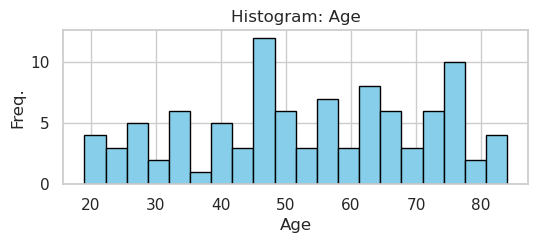

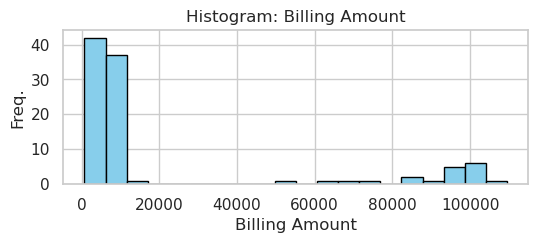

In [126]:
# Histograms:

# Selecting only numerical columns
numerical_columns = healthcare_dataset_eda.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 2))
    plt.hist(healthcare_dataset_eda[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Freq.')
    plt.title(f'Histogram: {column}')
    plt.grid(True)
    plt.show()

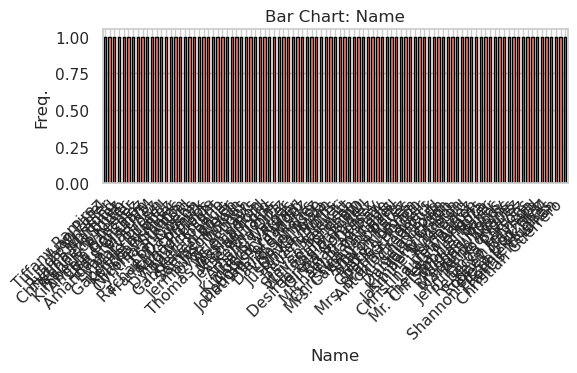

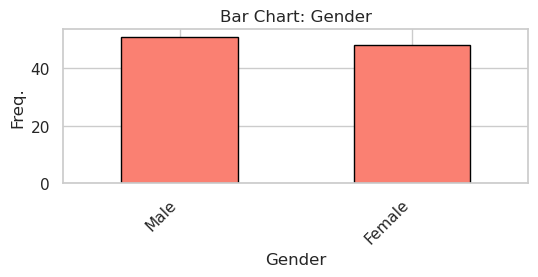

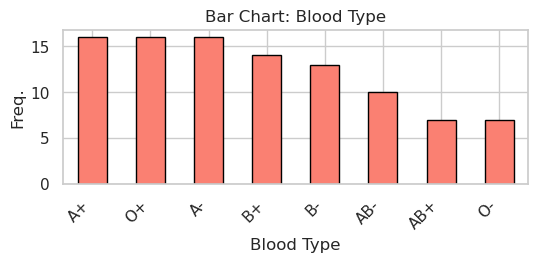

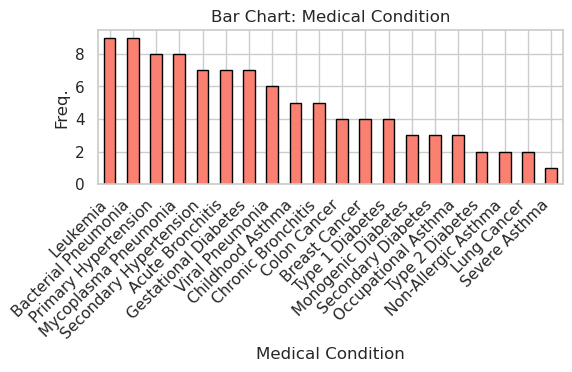

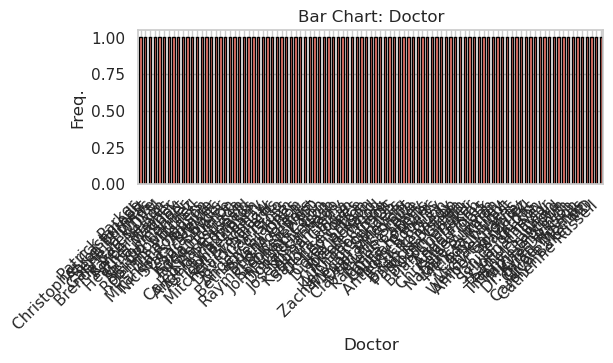

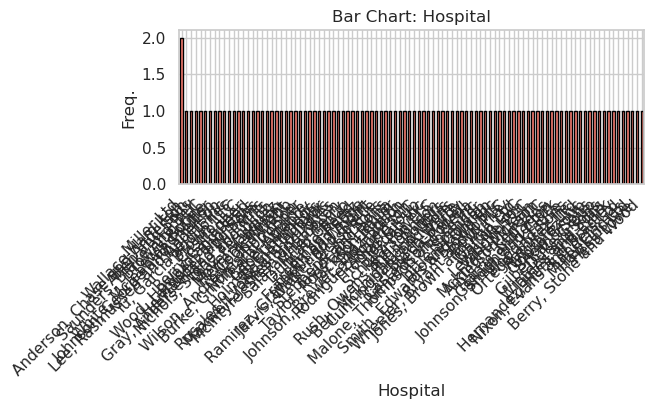

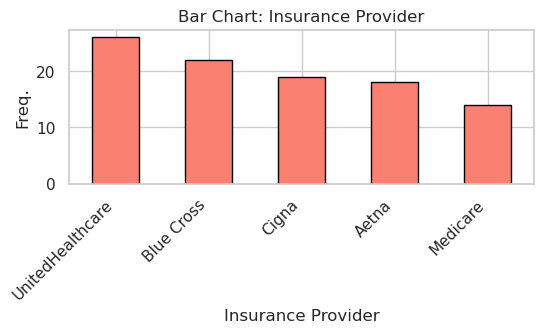

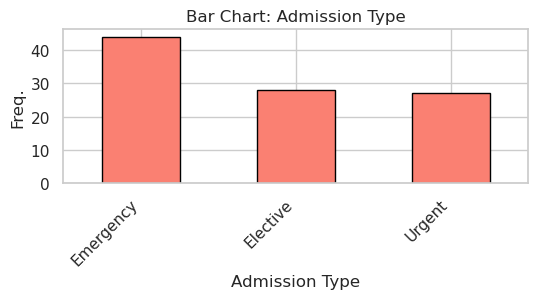

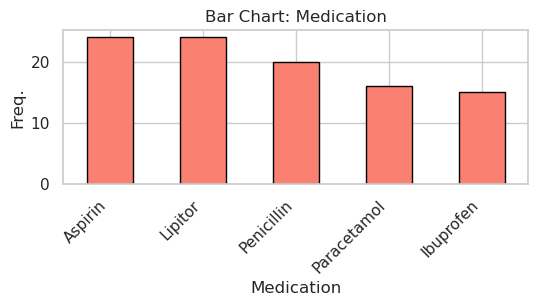

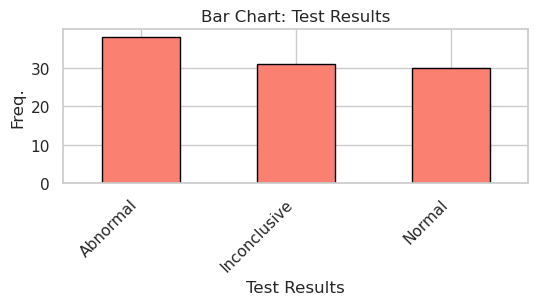

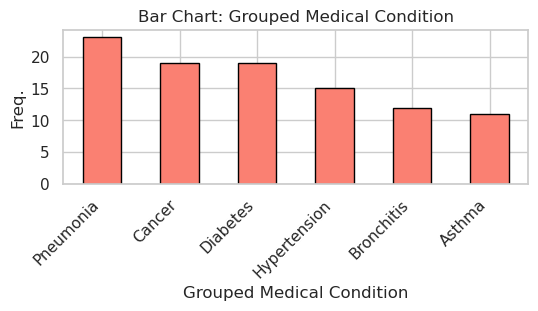

In [127]:
# Bar Charts:

# Selecting only object columns
object_columns = healthcare_dataset_eda.select_dtypes(include=['object'])

# Plotting bar charts for each object column
for column in object_columns.columns:
    plt.figure(figsize=(6, 2))
    object_counts = healthcare_dataset_eda[column].value_counts()
    object_counts.plot(kind='bar', color='salmon', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Freq.')
    plt.title(f'Bar Chart: {column}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.show()

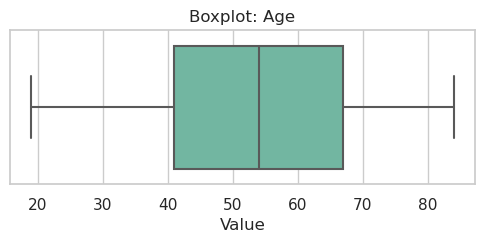

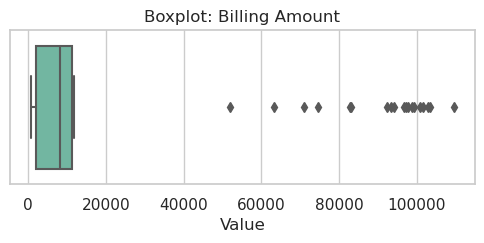

In [128]:
# Boxplots:

# Setting style
sns.set(style="whitegrid")

# Creating separate boxplots for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 2)) 
    sns.boxplot(x=numerical_columns[column], palette='Set2')  
    plt.title(f'Boxplot: {column}')
    plt.xlabel('Value')
    plt.show()

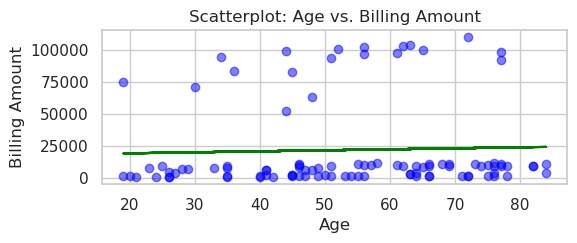

In [129]:
# Scatterplot:

# Creating scatterplot
plt.figure(figsize=(6, 2))
plt.scatter(healthcare_dataset_eda['Age'], healthcare_dataset_eda['Billing Amount'], alpha=0.5, color='blue')

# Fitting a linear regression line
b, m = polyfit(healthcare_dataset_eda['Age'], healthcare_dataset_eda['Billing Amount'], 1)
plt.plot(healthcare_dataset_eda['Age'], b + m * healthcare_dataset_eda['Age'], '-', color='Green')

# Setting plot title and labels
plt.title('Scatterplot: Age vs. Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')

# Printing the result
plt.grid(True)
plt.show()

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


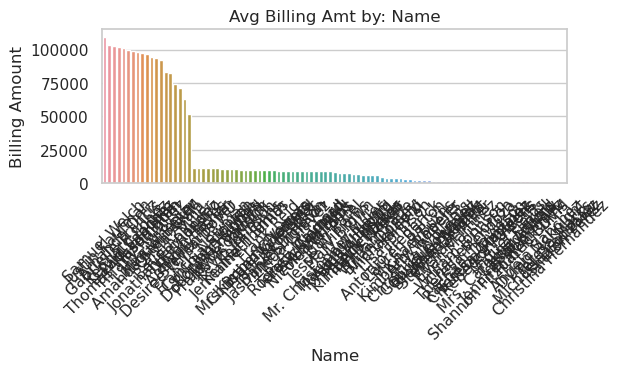

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


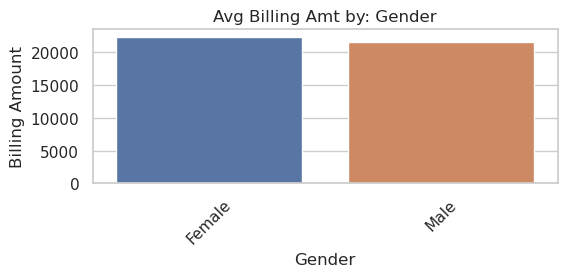

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


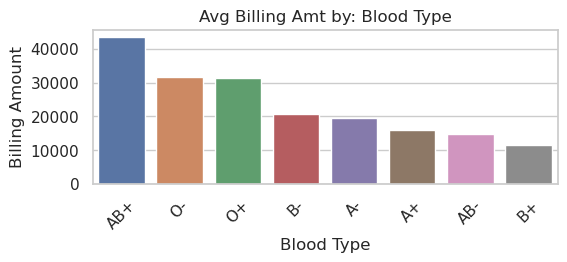

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


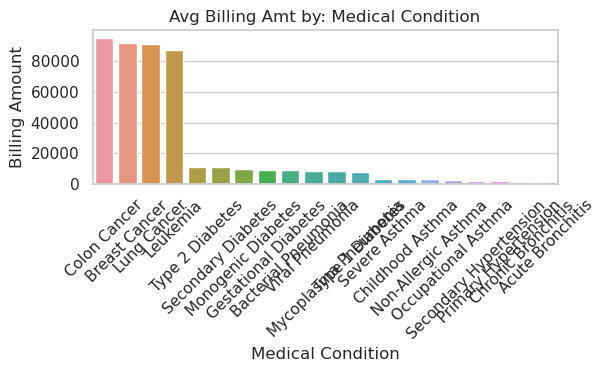

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


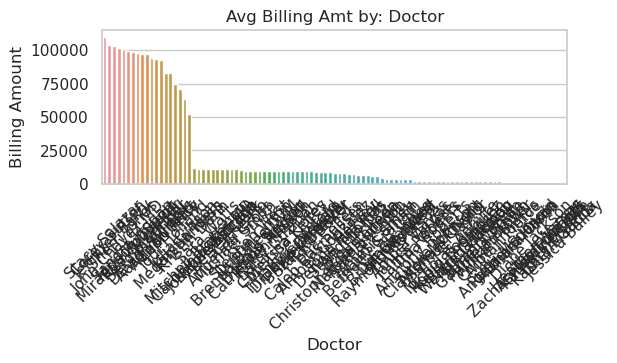

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


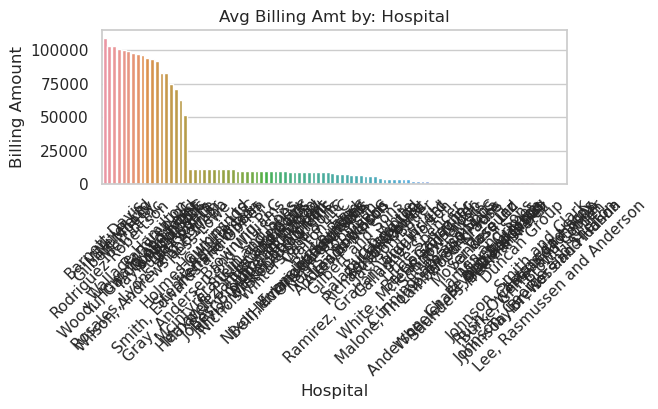

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


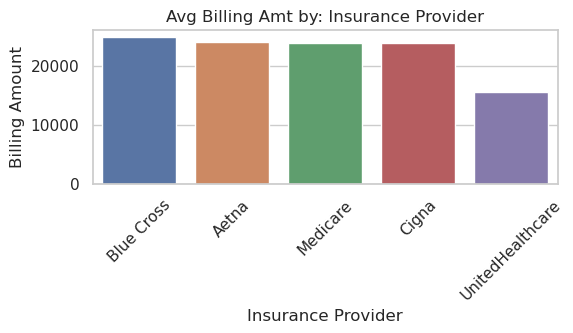

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


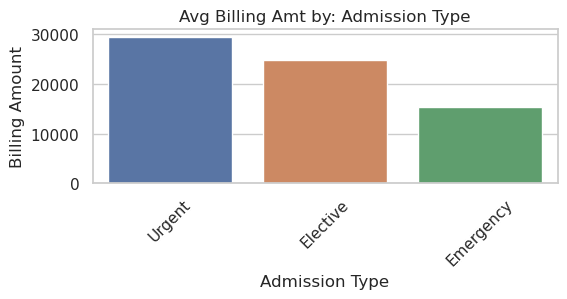

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


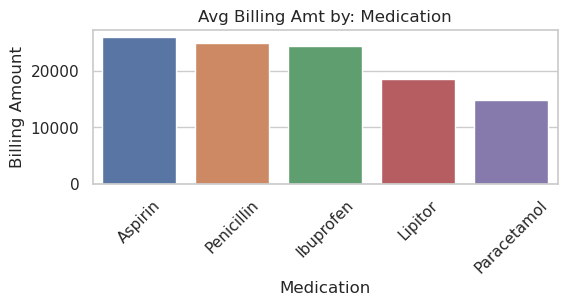

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


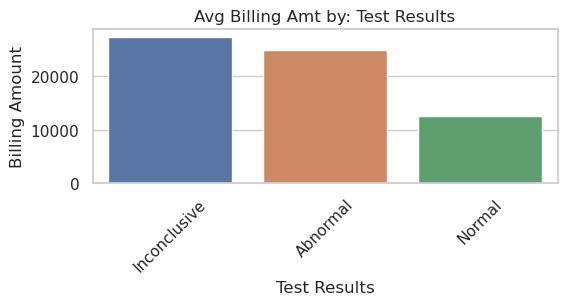

/tmp/ipykernel_350/3886809668.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


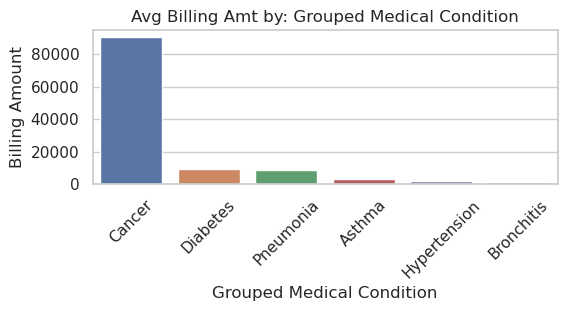

In [130]:
# Bar Plots: Categorical vs avg. "Billing Amount"
for column in object_columns.columns:
    plt.figure(figsize=(6, 2))
    sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_eda, estimator='mean', ci=None, order=healthcare_dataset_eda.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)
    plt.title(f'Avg Billing Amt by: {column}')
    plt.xticks(rotation=45)
    plt.show()

### 2. Observations/Interpretation from the plots:

#### Histograms:
- **Age**: 
    - Distribution appears to be relatively uniform across the range (consistent pattern). This may suggest wide range of age representation across all age group.  
    - Tallest bar falls within the 40-50 age bracket (followed by 70-80 bracket) which indicates higher frequencies are within those bins. 
    - Other age brackets show varying heights but maintain a generally balanced distribution
- **Billing Amount**: 
    - Displays two dominant bars (highest freq.) in the leftmost side within the first two bins. This suggests a concentration of billing amounts within the lower value range.
    - Other bars are significantly lower, with a slight increase towards the right side of the plot. But they are still visibly shorter compared to the dominant left.
    - Because of the imbalance (dominant lower value range), the model may have trouble identifying high value range through this dataset. 

#### Bar Charts:
- Most of the bar charts display a clear pattern of high to low volume with no dominant category
- For the Name, Hospital, and Doctor features, the plots indicated that they have unique values in their respective categories. Not much information was pulled from these charts.
- Absence of super dominant categories suggests a diverse and healthy distribution. Therefore, the model should theoritically capture nuances across the categoricals for enhanced predictive output.

#### Boxplot:
- **Age**:
    - Distribution appears to be relatively even, with no outliers detected beyond the whiskers (as seen in the histogram)
    - Even distribution indicates a balanced distribution across different age group with no extreme values
- **Billing Amount**: 
    - Box and whiskers are located in the left side of the plot which conveys that majority of billing amounts are congregated in the lower value range
    - Many dots outside of the right whisker suggests there are outliers. This indicates that there are some instances that have expectionally high billing amounts (unique case or anomalies)

#### Scatterplot (Numerical vs "Billing Amount"):
- Two distinct clusters of data points: Majority of the points are concentrated below the 25,000 billing amount mark, with relatively even distribution across age group. There is also a separate data point group above the 50,000 billing amount mark. 
- Trend line appears to have a slightly positive slope. This indicates a slight positive correlation between age and billing amount (not very strong)
- Two separate cluster of data points suggest that billing amounts are usually between 0-25,000 with some occurences in the 75,000-120,000
- There is a mild increase in billing amount with age (older patients have slightly higher bills)

#### Bar Charts (Categorical vs Avg. "Billing Amount"):
- Mainly saw 3 different patterns:
    - Displaying patterns of high to low volume with no dominant category (**Blood Type, Admission Type, Medication, Test Results**) 
    - Displaying patterns of high to low volume with dominant category (**Name, Grouped Medical Condition, Doctor, Hospital**) 
    - Plots with evenly distributed bar heights that indidcates an even representation of values within category (**Gender, Insurance Provider**)

#### My Thought Process:
- Originally, I was planning to remove Name, Doctor, and Hospital as they had too many unique categories per feature. However, looking at my 2nd bar charts and seeing how the billing amounts were distributed between these categories, I have decided to keep them as some of the variables have major influence in the average billing amount. 
- For those that contain prominent categories within my 2nd bar charts, I have decided to group less frequent values into "Others" (Meaning: Categories with avg. billing amount below 25,000). Why? All for the purpose of reducing the number of distinct categories and preventing the model from overfitting.
- I have decided to not remove my outliers as they represent genuine data points that are valid. Since the dataset is small (99 rows), I would like to keep them for model training because deleting them can lead to loss of valuable insights. Though they are outliers, there are still a good amount of them to be considered insightful data points.

## Data Preprocessing and Feature Engineering:
- Preprocessing data and applying feature engineering to make it suitable for modeling
- **Objective**:
    1. Grouping less frequent values into "Others" category for Name, Doctor, Hospital
        - Logic: Identify categories with an avg. billing amount below 25,000 and replace categories with string "Others"
        - Picked 25,000 as my threshold, using my bar charts
    2. Encoding:
        - Manual encoding for features with small unique counts as it offers better control and clarity
        - Label encoding for features with many unique counts as referenced in https://heartbeat.comet.ml/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

In [131]:
# Creating a copy of the df to perform data processing
healthcare_dataset_dp = healthcare_dataset_eda.copy()

### 1. Grouping less frequent values into "Others" category:

In [132]:
# Grouping "Name" features:

# Calculating the average billing amount for each category in the "Name" column
name_avg_billing = healthcare_dataset_dp.groupby('Name')['Billing Amount'].mean()

# Identifying categories with an average billing amount below 25,000
categories_to_rename1 = name_avg_billing[name_avg_billing < 25000].index

# Replacing categories with an average billing amount below 25,000 with "Others"
healthcare_dataset_dp['Name'] = healthcare_dataset_dp['Name'].apply(lambda x: 'Others' if x in categories_to_rename1 else x)

In [133]:
# Printing updated names:
unique_names = healthcare_dataset_dp['Name'].unique()
unique_names

array(['Tiffany Ramirez', 'Others', 'Desiree Williams MD',
       'Beverly Miller', 'Miguel Baker', 'Justin Kaufman', 'Olivia Ayala',
       'Kenneth Lopez', 'Amanda Stein DVM', 'Paul Graham',
       'Linda Wheeler', 'Tyler Rosario', 'David Sanchez',
       'Jonathan Fernandez', 'Anthony Fisher', 'Amanda Ortiz',
       'Thomas Washington', 'Jason Horn', 'Samuel Welch',
       'Gabrielle Francis'], dtype=object)

In [134]:
# Grouping "Doctor" features:

# Calculating the average billing amount for each category in the "Name" column
doctor_avg_billing = healthcare_dataset_dp.groupby('Doctor')['Billing Amount'].mean()

# Identifying categories with an average billing amount below 25,000
categories_to_rename2 = doctor_avg_billing[doctor_avg_billing < 25000].index

# Replacing categories with an average billing amount below 25,000 with "Others"
healthcare_dataset_dp['Doctor'] = healthcare_dataset_dp['Doctor'].apply(lambda x: 'Others' if x in categories_to_rename2 else x)

In [135]:
# Printing updated doctors:
unique_doctors = healthcare_dataset_dp['Doctor'].unique()
unique_doctors

array(['Patrick Parker', 'Others', 'Megan Sanders', 'Jodi Holland',
       'Mark Hill', 'Corey Sutton', 'Leon Price', 'Miranda Robinson',
       'Sergio Conner', 'Mr. John Short', 'Aaron Burnett', 'Julia Gibson',
       'Sandra Hogan', 'Adrian Terry', 'Kristin Nash', 'John Chavez MD',
       'Sherri Jones', 'David Williams', 'Stacy Salazar',
       'Jennifer Barry'], dtype=object)

In [136]:
# Grouping "Hospital" features:

# Calculating the average billing amount for each category in the "Name" column
hospital_avg_billing = healthcare_dataset_dp.groupby('Hospital')['Billing Amount'].mean()

# Identifying categories with an average billing amount below 25,000
categories_to_rename3 = hospital_avg_billing[hospital_avg_billing < 25000].index

# Replacing categories with an average billing amount below 25,000 with "Others"
healthcare_dataset_dp['Hospital'] = healthcare_dataset_dp['Hospital'].apply(lambda x: 'Others' if x in categories_to_rename3 else x)

In [137]:
# Printing updated hospitals:
unique_hospitals = healthcare_dataset_dp['Hospital'].unique()
unique_hospitals

array(['Wallace-Hamilton', 'Others', 'Pugh-Rogers', 'Vaughn PLC',
       'Ramirez Inc', 'Rodriguez-Robertson', 'Cook-Wright',
       'Wood, Howard and Reed', 'Yu, Garcia and Jones', 'Merritt Inc',
       'Wilson, Andrews and Webb', 'Diaz-Smith', 'Miller Ltd',
       'Taylor and Sons', 'Jackson-Le', 'Miller-Perry',
       'Rosales, Lyons and Aguilar', 'Barnett-Davis', 'Gilbert-Moody'],
      dtype=object)

/tmp/ipykernel_350/110702079.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_dp, estimator='mean', ci=None, order=healthcare_dataset_dp.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


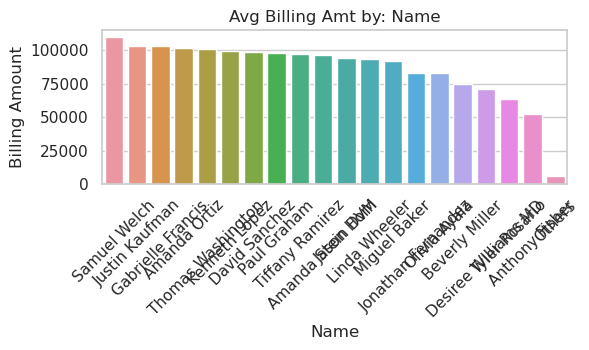

/tmp/ipykernel_350/110702079.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_dp, estimator='mean', ci=None, order=healthcare_dataset_dp.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


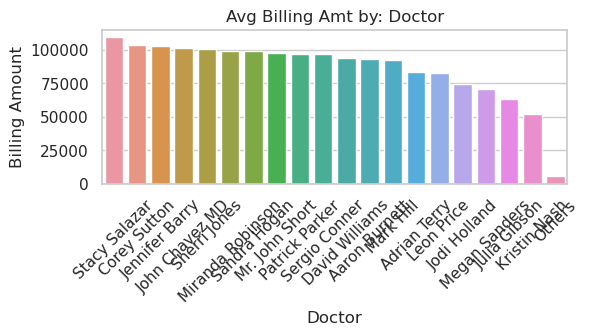

/tmp/ipykernel_350/110702079.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_dp, estimator='mean', ci=None, order=healthcare_dataset_dp.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)


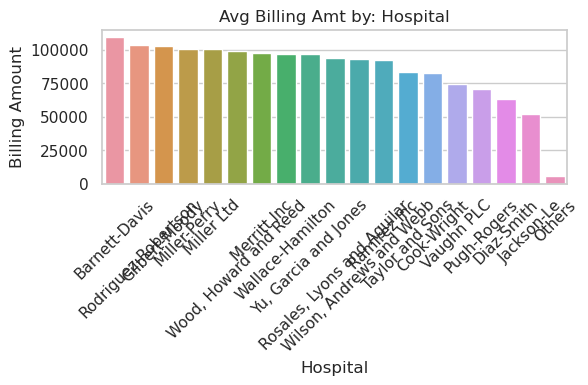

In [138]:
# Updated Bar Plots: Categorical vs avg. "Billing Amount"

# Displaying these bar plots again to show the reduction and the simplification of the three features with many unique categories 
object_column_dp = healthcare_dataset_dp[['Name', 'Doctor', 'Hospital']]

for column in object_column_dp.columns:
    plt.figure(figsize=(6, 2))
    sns.barplot(x=column, y='Billing Amount', data=healthcare_dataset_dp, estimator='mean', ci=None, order=healthcare_dataset_dp.groupby(column)['Billing Amount'].mean().sort_values(ascending=False).index)
    plt.title(f'Avg Billing Amt by: {column}')
    plt.xticks(rotation=45)
    plt.show()

In [139]:
# Removing "Medical Condition" column as this feature was replaced by "Grouped Medical Condition"
healthcare_dataset_dp.drop(columns=['Medical Condition'], inplace=True)

In [140]:
# Removing "Date of Admission" & "Discharge Date" columns as these features do not contribute to the model training
healthcare_dataset_dp.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

### 2. Encoding:
- Manual encoding for features with small unique counts as it offers better control and clarity
    - Gender, Blood Type, Insurance Provider, Admission Type, Medication, Test Results, Grouped Medical Conditions
- Label encoding for features with many unique counts as referenced in https://heartbeat.comet.ml/a-practical-guide-to-feature-engineering-in-python-8326e40747c8
    - Name, Hospital, Doctors

In [141]:
#Setup
import category_encoders as ce

In [142]:
# Creating a copy of the df to perform feature engineering
healthcare_dataset_fe = healthcare_dataset_dp.copy()

In [143]:
#Checking the number of unique classes
cat_cols = healthcare_dataset_fe.select_dtypes(include='object').columns
for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(healthcare_dataset_fe[col].nunique())
    print('--------------------------')

Number of classes in Name
20
--------------------------
Number of classes in Gender
2
--------------------------
Number of classes in Blood Type
8
--------------------------
Number of classes in Doctor
20
--------------------------
Number of classes in Hospital
19
--------------------------
Number of classes in Insurance Provider
5
--------------------------
Number of classes in Admission Type
3
--------------------------
Number of classes in Medication
5
--------------------------
Number of classes in Test Results
3
--------------------------
Number of classes in Grouped Medical Condition
6
--------------------------


In [144]:
# Checking the unique values per feature
categorical_features_fe = healthcare_dataset_fe.select_dtypes(include=['object']).columns
for feature in categorical_features_fe:
    print(f"\nDistribution of {feature}:")
    print(healthcare_dataset_fe[feature].value_counts())


Distribution of Name:
Name
Others                 80
Tiffany Ramirez         1
Samuel Welch            1
Jason Horn              1
Thomas Washington       1
Amanda Ortiz            1
Anthony Fisher          1
Jonathan Fernandez      1
David Sanchez           1
Tyler Rosario           1
Linda Wheeler           1
Paul Graham             1
Amanda Stein DVM        1
Kenneth Lopez           1
Olivia Ayala            1
Justin Kaufman          1
Miguel Baker            1
Beverly Miller          1
Desiree Williams MD     1
Gabrielle Francis       1
Name: count, dtype: int64

Distribution of Gender:
Gender
Male      51
Female    48
Name: count, dtype: int64

Distribution of Blood Type:
Blood Type
A+     16
O+     16
A-     16
B+     14
B-     13
AB-    10
AB+     7
O-      7
Name: count, dtype: int64

Distribution of Doctor:
Doctor
Others              80
Patrick Parker       1
Stacy Salazar        1
David Williams       1
Sherri Jones         1
John Chavez MD       1
Kristin Nash         1
Adr

In [145]:
# Manual encoding for features with small unique counts: 

# Gender, Blood Type, Insurance Provider, Admission Type, Medication, Test Results, Grouped Medical Conditions Encoding:

# Defining mappings for each categorical column
gender_mapping = {'Male': 1, 'Female': 2}
blood_type_mapping = {'A+': 1, 'O+': 2, 'A-': 3, 'B+': 4, 'B-': 5, 'AB-': 6, 'AB+': 7, 'O-': 8}
insurance_provider_mapping = {'UnitedHealthcare': 1, 'Blue Cross': 2, 'Cigna': 3, 'Aetna': 4, 'Medicare': 5}
admission_type_mapping = {'Emergency': 1, 'Elective': 2, 'Urgent': 3}
medication_mapping = {'Aspirin': 1, 'Lipitor': 2, 'Penicillin': 3, 'Paracetamol': 4, 'Ibuprofen': 5}
test_results_mapping = {'Abnormal': 1, 'Inconclusive': 2, 'Normal': 3}
grouped_medical_condition_mapping = {'Pneumonia': 1, 'Cancer': 2, 'Diabetes': 3, 'Hypertension': 4, 'Bronchitis': 5, 'Asthma': 6}

# Applying mapping to the df
healthcare_dataset_fe['Gender Encoded'] = healthcare_dataset_fe['Gender'].map(gender_mapping)
healthcare_dataset_fe['Blood Type Encoded'] = healthcare_dataset_fe['Blood Type'].map(blood_type_mapping)
healthcare_dataset_fe['Insurance Provider Encoded'] = healthcare_dataset_fe['Insurance Provider'].map(insurance_provider_mapping)
healthcare_dataset_fe['Admission Type Encoded'] = healthcare_dataset_fe['Admission Type'].map(admission_type_mapping)
healthcare_dataset_fe['Medication Encoded'] = healthcare_dataset_fe['Medication'].map(medication_mapping)
healthcare_dataset_fe['Test Results Encoded'] = healthcare_dataset_fe['Test Results'].map(test_results_mapping)
healthcare_dataset_fe['Grouped Medical Condition Encoded'] = healthcare_dataset_fe['Grouped Medical Condition'].map(grouped_medical_condition_mapping)

# Removing duplicate columns
healthcare_dataset_fe.drop(columns=['Gender', 'Blood Type', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Grouped Medical Condition'], inplace=True)

In [146]:
# Label encoding for features with large unique counts: 

# Age, Doctors, Hospitals: 
# Referenced code from: https://heartbeat.comet.ml/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

cat_cols_fe = healthcare_dataset_fe.select_dtypes(include='object').columns
cat_cols_fe = ['Name', 'Doctor', 'Hospital']
encoder = ce.OrdinalEncoder(cols=cat_cols_fe)
healthcare_dataset_encoded = encoder.fit_transform(healthcare_dataset_fe)

# Removing duplicate columns
healthcare_dataset_encoded.drop(['Name', 'Doctor', 'Hospital'], axis=1, inplace=True)

# Printing final results that will be used for model training:
healthcare_dataset_encoded.head().T

,0,1,2,3,4
Age,61,45,77,84,56
Billing Amount,97088,1405,9188,3773,9880
Gender Encoded,2,1,1,1,1
Blood Type Encoded,7,4,5,1,2
Insurance Provider Encoded,2,1,5,2,1
Admission Type Encoded,2,1,1,3,3
Medication Encoded,1,2,2,3,4
Test Results Encoded,2,3,3,1,3
Grouped Medical Condition Encoded,2,5,1,6,1


## Model Training:
1. Selecting the right algorithm for my project
2. Training the model using the cleaned, preprocessed, and encoded data
3. Evaluation metric interpretation

In [151]:
# Setup
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1. Selecting the right algorithm for my project:
- I was mainly torn between Linear Regression and Random Forest model. But in the end, I have decided to go with Random Forest as my data model
- My dataset would be suitable with Linear Regression as there are some linear relationships between my features and target variables
- But the reason why I choose Random Forest over Linear Regression are:
    - Able to handle both mixture of categorical and numerical (I have more categorical features than numerical)
    - Capable of handling outliers as they are less to sensitive to it (per my plots, I have many outliers in my target variable)
    - As I have a small dataset (99 rows), I wanted to avoid models that are prone to overfitting. Since Random Forest are great at handling small datasets and mitigating overfitting, I ultimately chose Random Forests.

### 2. Training the model using the cleaned, preprocessed, and encoded data:

In [153]:
# Splitting features and target variable
X = healthcare_dataset_encoded.drop('Billing Amount', axis=1)
y = healthcare_dataset_encoded['Billing Amount']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 92628610.97228503
Mean Absolute Error (MAE): 5404.3805
R^2 Score: 0.9467219823954153


In [158]:
# Displaying Billing Amount summary to reference with evaluation metrics

billing_amount_summary = healthcare_dataset_encoded['Billing Amount'].describe()
billing_amount_summary

count        99.000000
mean      21931.282828
std       34262.399450
min         714.000000
25%        1956.500000
50%        8253.000000
75%       11152.000000
max      109535.000000
Name: Billing Amount, dtype: float64

### 3. Evaluation metric interpretation:
- **MSE**: On average, the squared difference between the actual billing amounts and the predicted billing amounts is 92,628,610
- **MAE**: In terms of average absolute difference, the model's predictions are off by around 5,404
    - Considering the range (714 - 109,535), the MAE may not provide the best prediction accuracy
    - Referencing the "Billing Amount" histogram again, we know that there are two main concentration clusters. First, we have a dominant concentration of billing amounts within the lower value range (leftmost bins). There is also a small concentration of billing amounts on the high value range (rightmost bins). Taking this into consideration, the model's errors might be larger when predicting higher billing amounts due to the dataset's dominant low value range. Therefore, the 5,404 could be a reasonable number.    
- **R-squared**: Around 94.67% of in the billing amounts can be predicted through the model
    - Suggests that the model performs well based on features used for prediction

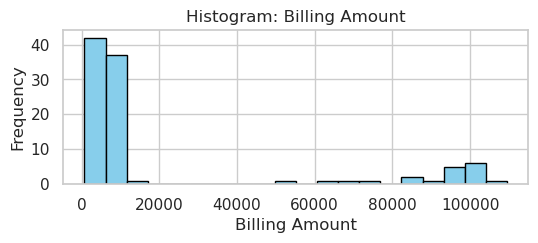

In [160]:
# Billing Amount Histogram:

plt.figure(figsize=(6, 2))
plt.hist(healthcare_dataset_encoded['Billing Amount'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.title('Histogram: Billing Amount')
plt.grid(True)
plt.show()

## Model Tuning:
**Objective**: 
- Perform hyperparameter tuning for a Random Forest regressor using GridSearchCV
- Bring out the best parameters for my model

**My Steps**: 
- Defining Random Forest regressor
- Defining hyperparameter to tune
    - Specifying: n_estimators, max_depth, min_samples_split, and min_samples_leaf
- Performing GridSearchCV
    - Performing a grid search over the specified hyperparameters with 5 fold cross validation
- Fitting the GridSearchCV to the training data
- Printing the best parameters foudn by GridSearchCV

In [161]:
# Setup

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [165]:
# Defining the Random Forest regressor
rf_regressor = RandomForestRegressor()

# Defining the hyperparameters I want to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Max depth of the tree
    'min_samples_split': [2, 5, 10], # Min number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Min number of samples required at each leaf node
}

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


#### Model Tuning Output:
Antipating that the hyperparameters identified through GridSearchCV will minimize the MSE/MAE and optimize the model's performance

## Model Retraining:
- Retrain random forest regressor using optimized hyperparameters
- Evaluate model's performance using the same evaluation metrics used as the first model

In [166]:
# Creating a new instance of RandomForestRegressor with the best parameters
best_rf_regressor = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100)

# Fitting the model to the training data
best_rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
best_y_pred = best_rf_regressor.predict(X_test)

# Calculating evaluation metrics
best_mse = mean_squared_error(y_test, best_y_pred)
best_mae = mean_absolute_error(y_test, best_y_pred)
best_r2 = r2_score(y_test, best_y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", best_mse)
print("Mean Absolute Error (MAE):", best_mae)
print("R-squared (R2) Score:", best_r2)

Mean Squared Error (MSE): 93641159.89090273
Mean Absolute Error (MAE): 5952.656785355879
R-squared (R2) Score: 0.9461395856764603


### 2nd evaluation metric interpretation:

- **MSE**: The squared difference is little bit higher compared to the first model. The model's predictions are slightly less accurate compared to the first model
- **MAE**: Similar to MSE, the MAE is slightly higher compared to the first model, suggesting less accurate predictions
- **R2**: Slightly lower compared to the first model, suggesting that the second model explains slightly less variance in the target variable

Overall, the second model with the "best parameters" performed slightly worse in terms of prediction accuracy compared to the first model. While the parameters selected through GridSearchCV should be considered the best, this may not be the case for my given dataset. The original parameters ended up being more accurate. 

## Additional Documentation:

#### My Concluding Remarks:
While the retrained model showed a slight decrease in performance compared to the original, considering the great evaluation metric output of the initial model, I am still content with the overall performance of both models. I would conduct additional and iterative hyperparameter tuning and explore more advanced optimization techniques to find the optimal set of model parameters. Ultimately, this would be to drive continuous improvement of my model.